In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [116]:
salarydata_train = pd.read_csv('SalaryData_Train.csv')
salarydata_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [117]:
salarydata_test = pd.read_csv('SalaryData_Test.csv')
salarydata_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [118]:
salarydata_train.shape

(30161, 14)

In [119]:
salarydata_test.shape

(15060, 14)

In [120]:
salarydata_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [121]:
salarydata_train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [122]:
salarydata_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [123]:
salarydata_test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [124]:
def age_group(x):
    x = int(x)
    x = abs(x)
    if( 18 < x < 31 ):
        return "19-30"
    if( 30 < x < 41 ):
        return "31-40"
    if( 40 < x < 51 ):
        return "41-50"
    if( 50 < x < 61 ):
        return "51-60"
    if( 60 < x < 71 ):
        return "61-70"
    else:
        return "Greater than 70"

salarydata_train['age_group'] = salarydata_train['age'].apply(age_group)

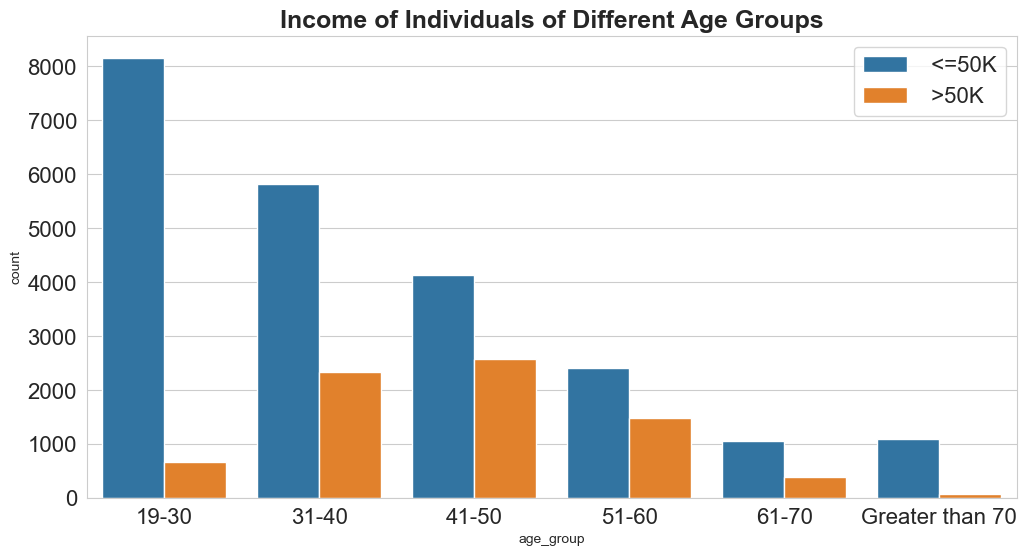

In [125]:
plt.figure(figsize=(12, 6))
order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']

sns.countplot(x=salarydata_train['age_group'], hue=salarydata_train['Salary'], palette='tab10', order=order_list)

plt.title('Income of Individuals of Different Age Groups', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.show()

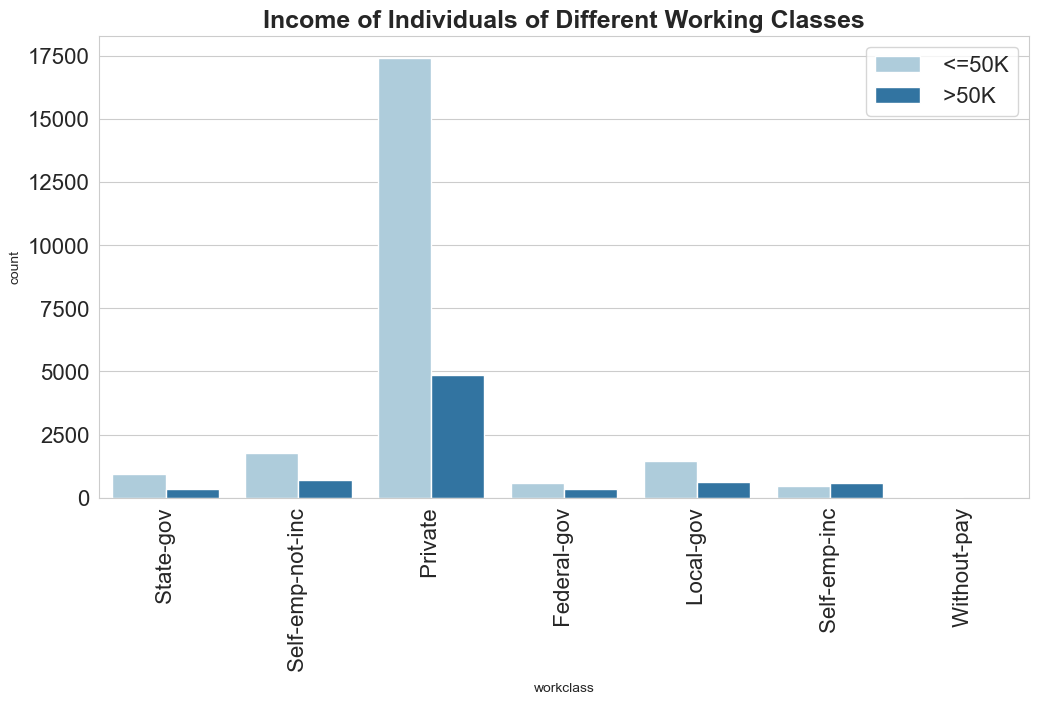

In [126]:
plt.figure(figsize=(12, 6))
sns.countplot(x=salarydata_train['workclass'], hue=salarydata_train['Salary'], palette='Paired')
plt.title('Income of Individuals of Different Working Classes', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16, rotation=90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.show()

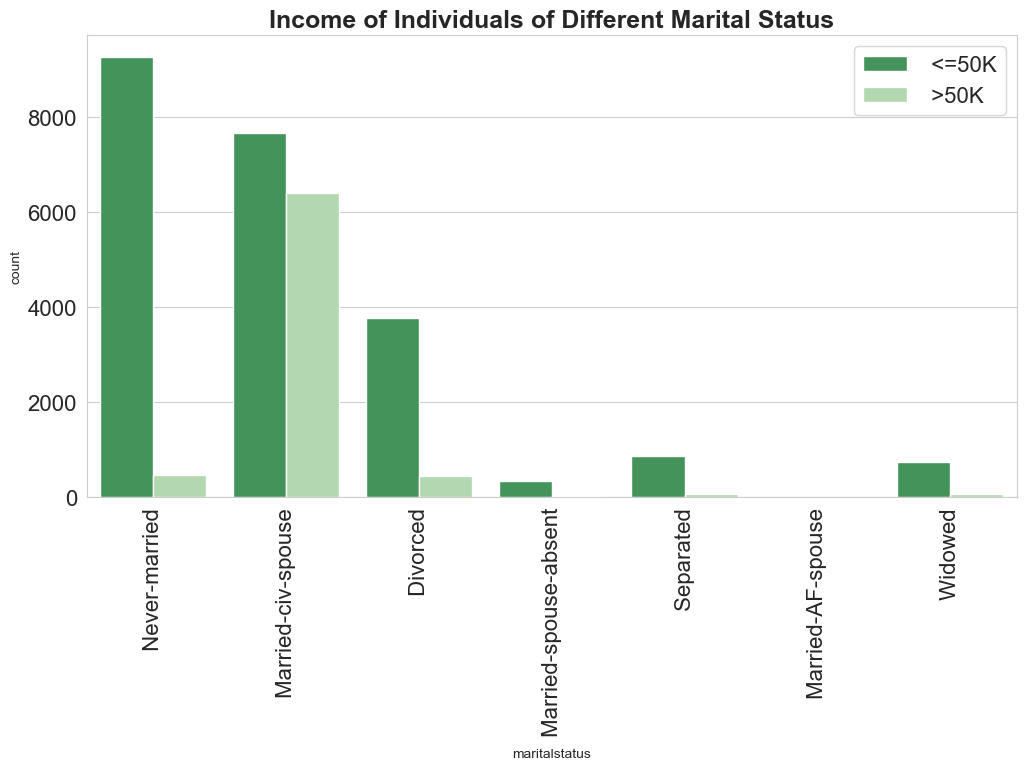

In [127]:
plt.figure(figsize=(12, 6))

sns.countplot(x=salarydata_train['maritalstatus'], hue=salarydata_train['Salary'], palette='Greens_r')

plt.title('Income of Individuals of Different Marital Status', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16, rotation=90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.show()

In [128]:
salarydata_train.isin(['?']).sum(axis=0)

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
age_group        0
dtype: int64

In [129]:
salarydata_test.isin(['?']).sum(axis=0)

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [130]:
categorical = [var for var in salarydata_train.columns if salarydata_train[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are\n', categorical)

There are 10 categorical variables

The categorical variables are
 ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary', 'age_group']


In [131]:
salarydata_train[categorical].head()

,workclass,education,maritalstatus,occupation,relationship,race,sex,native,Salary,age_group
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K,31-40
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K,41-50
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K,31-40
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K,51-60
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K,19-30


In [132]:
# checking null values

salarydata_train[categorical].isnull().sum()

workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
native           0
Salary           0
age_group        0
dtype: int64

In [133]:
# checking frequency counts

for var in categorical:
    print(salarydata_train[categorical].value_counts())

workclass     education      maritalstatus           occupation        relationship  race                 sex      native          Salary  age_group
 Private       HS-grad        Married-civ-spouse      Craft-repair      Husband       White                Male     United-States   <=50K  31-40        207
               Bachelors      Married-civ-spouse      Exec-managerial   Husband       White                Male     United-States   >50K   31-40        145
                                                                                                                                           41-50        129
               HS-grad        Married-civ-spouse      Craft-repair      Husband       White                Male     United-States   <=50K  19-30        128
                                                                                                                                           41-50        115
                                                                       

In [134]:
salarydata_train.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay'], dtype=object)

In [135]:
salarydata_train.workclass.value_counts()

workclass
 Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: count, dtype: int64

In [136]:
salarydata_train.occupation.unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Transport-moving',
       ' Farming-fishing', ' Machine-op-inspct', ' Tech-support',
       ' Craft-repair', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [137]:
salarydata_train.occupation.value_counts()

occupation
 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1965
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: count, dtype: int64

In [138]:
salarydata_train.native.unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
       ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
       ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
       ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
       ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
       ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
       ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',
       ' Hungary'], dtype=object)

In [139]:
salarydata_train.native.value_counts()

native
 United-States                 27504
 Mexico                          610
 Philippines                     188
 Germany                         128
 Puerto-Rico                     109
 Canada                          107
 India                           100
 El-Salvador                     100
 Cuba                             92
 England                          86
 Jamaica                          80
 South                            71
 China                            68
 Italy                            68
 Dominican-Republic               67
 Vietnam                          64
 Guatemala                        63
 Japan                            59
 Poland                           56
 Columbia                         56
 Iran                             42
 Taiwan                           42
 Haiti                            42
 Portugal                         34
 Nicaragua                        33
 Peru                             30
 Greece                        

In [140]:
X = salarydata_train.drop(['Salary'], axis=1)
y = salarydata_train['Salary']

In [141]:
from sklearn.model_selection import train_test_split

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [143]:
X_train.shape, X_test.shape

((21112, 14), (9049, 14))

In [144]:
X_train.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
age_group        object
dtype: object

In [145]:
X_test.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
age_group        object
dtype: object

In [146]:
# display categorical variables

categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']
categorical

['workclass',
 'education',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native',
 'age_group']

In [147]:
# display numerical variables

numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']
numerical

['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']

In [148]:
X_train[categorical].isnull().sum()

workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
native           0
age_group        0
dtype: int64

In [149]:
# print categorical variables with missing data

for col in categorical:
    if X_train[col].isnull().mean()>0:
        print(col, (X_train[col].isnull().mean()))

In [150]:
# impute missing categorical variables with most frequent value

for df2 in [X_train, X_test]:
    df2['workclass'].fillna(X_train['workclass'].mode()[0], inplace=True)
    df2['occupation'].fillna(X_train['occupation'].mode()[0], inplace=True)
    df2['native'].fillna(X_train['native'].mode()[0], inplace=True)  

In [151]:
# encode categorical variables

categorical

['workclass',
 'education',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native',
 'age_group']

In [152]:
X_train[categorical].head()

,workclass,education,maritalstatus,occupation,relationship,race,sex,native,age_group
8166,Local-gov,Some-college,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,51-60
7138,Private,Some-college,Never-married,Other-service,Own-child,White,Male,United-States,19-30
437,Private,HS-grad,Never-married,Transport-moving,Not-in-family,White,Male,United-States,19-30
5436,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,41-50
6541,Self-emp-not-inc,HS-grad,Married-civ-spouse,Tech-support,Husband,White,Male,United-States,31-40


In [153]:
!pip install category_encoders

In [154]:
# import category encoders

import category_encoders as ce

In [155]:
encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [156]:
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,...,native_32,native_33,native_34,native_35,native_36,native_37,native_38,native_39,native_40,age_group
8166,54,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,51-60
7138,21,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,19-30
437,30,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,19-30
5436,42,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,41-50
6541,37,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,31-40


In [157]:
X_train.shape

(21112, 103)

In [158]:
X_test.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,...,native_32,native_33,native_34,native_35,native_36,native_37,native_38,native_39,native_40,age_group
25338,21,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,19-30
18840,21,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,19-30
8391,56,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,51-60
18258,43,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,41-50
16669,53,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,51-60


In [159]:
X_test.shape

(9049, 103)

Feature Scaling

In [160]:
cols = X_train.columns

In [161]:
from sklearn.preprocessing import RobustScaler

In [ ]:
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [163]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [62]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [63]:
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,...,native_31,native_32,native_33,native_34,native_35,native_36,native_37,native_38,native_39,native_40
0,0.894737,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.842105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.368421,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.263158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Model Training

In [65]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

Predict Results

In [66]:
y_pred = gnb.predict(X_test)
y_pred

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype='<U6')

Check Accuracy Score

In [67]:
from sklearn.metrics import accuracy_score
print('Model Accuracy Score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Model Accuracy Score: 0.7995


Compare Train Set and Train Set Accuracy

In [68]:
y_pred_train = gnb.predict(X_train)
y_pred_train

array([' >50K', ' <=50K', ' <=50K', ..., ' <=50K', ' >50K', ' <=50K'],
      dtype='<U6')

In [69]:
print('Training set accuracy: {0:0.4f}'.format(accuracy_score(y_train, y_pred_train)))

Training set accuracy: 0.8023


Confusion Matrix

In [72]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix\n\n', cm)
print('\nTrue Positive(TP)', cm[0,0])
print('True Negative(TN)', cm[1,1])
print('False Positive(FP)', cm[0,1])
print('False Negative(FN)', cm[1,0])

Confusion Matrix

 [[5422 1376]
 [ 438 1813]]

True Positive(TP) 5422
True Negative(TN) 1813
False Positive(FP) 1376
False Negative(FN) 438


<Axes: >

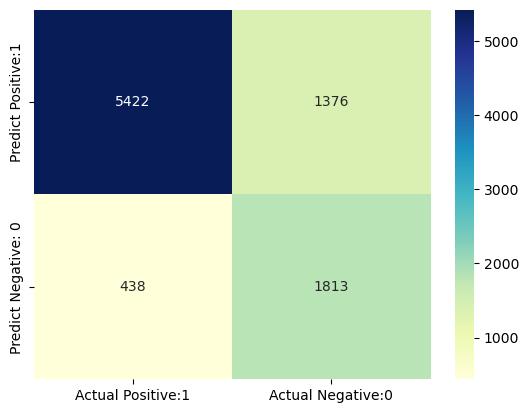

In [73]:
# Visualize with heatmap

import seaborn as sns
cm_matrix = pd.DataFrame(data = cm, columns = ['Actual Positive:1', 'Actual Negative:0'], index = ['Predict Positive:1', 'Predict Negative: 0'])
sns.heatmap(cm_matrix, annot = True, fmt = 'd', cmap = 'YlGnBu') 

Classification Metrics

In [74]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.93      0.80      0.86      6798
        >50K       0.57      0.81      0.67      2251

    accuracy                           0.80      9049
   macro avg       0.75      0.80      0.76      9049
weighted avg       0.84      0.80      0.81      9049



Classification Accuracy

In [75]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [77]:
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy {0:0.4f}'.format(classification_accuracy))

Classification accuracy 0.7995


Classification Error

In [79]:
classification_error = (FP + FN) / float (TP + TN + FP + FN)
print('Classification Error: {0:0.4f}'.format(classification_error))

Classification Error: 0.2005


Precision

In [80]:
precision = TP / float(TP + FP)
print('Precision: {0:0.4f}'.format(precision))

Precision: 0.7976


Recall

In [81]:
recall = TP / float (TP + FN)
print('Recall: {0:0.4f}'.format(recall))

Recall: 0.9253


F1 Score

In [84]:
f1_score = 2 * (precision * recall) / (precision + recall)
print('F1 Score: {0:0.4f}'.format(f1_score))

F1 Score: 0.8567
